:Importing basic librabry for EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Done!")


Done!


In [ ]:
# read csv file into dataframe   #
url = '/content/drive/MyDrive/major project/dataset.csv'
data = pd.read_csv(url)
data.head()

,time,name,reflectivity,velocity,power,spectrum_width
0,23:50:08,NGP180213235003.RAWCG1T,30.5,1.007874,31.5,7.8225
1,22:50:15,NGP180213225007.RAWD9BK,30.5,7.820000,30.5,7.8200
2,23:40:09,NGP180213234003.RAWCFZG,31.5,1.007874,33.0,7.8225
3,23:20:11,NGP180213232003.RAWD9BS,31.0,7.820000,31.5,7.8200
4,23:30:10,NGP180213233003.RAWD9BU,30.5,7.820000,34.5,7.8200


In [ ]:
data.tail()

,time,name,reflectivity,velocity,power,spectrum_width
542,00:52:20,NGP180213005201.RAWD93N,31.5,3.940000,30.5,3.940000
543,00:02:25,NGP180213000201.RAWD93C,30.5,0.740000,31.0,0.740000
544,00:22:22,NGP180213002201.RAWC634,30.5,1.007874,30.5,2.217402
545,00:12:24,NGP180213001201.RAWD93E,32.0,1.230000,30.5,1.230000
546,00:32:21,NGP180213003207.RAWC65F,30.5,1.007874,30.5,2.956535


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            547 non-null    object 
 1   name            547 non-null    object 
 2   reflectivity    547 non-null    float64
 3   velocity        547 non-null    float64
 4   power           547 non-null    float64
 5   spectrum_width  547 non-null    float64
dtypes: float64(4), object(2)
memory usage: 25.8+ KB


In [ ]:
data.describe()

,reflectivity,velocity,power,spectrum_width
count,547.000000,547.000000,547.000000,547.000000
mean,31.548446,2.242412,31.461609,3.350687
std,2.799616,2.451174,1.876788,3.174738
min,30.500000,0.000000,30.500000,0.060000
25%,30.500000,1.007874,30.500000,1.230000
50%,30.500000,1.007874,31.000000,1.970000
75%,31.000000,1.970000,31.500000,7.820000
max,54.000000,10.590000,40.000000,14.043543


In [ ]:
data.shape

(547, 6)

In [ ]:
data = data.sort_values(by="time", ascending=True)  #data is sorted as per the time in ascending order  #
data

,time,name,reflectivity,velocity,power,spectrum_width
541,00:00:25,NGP180213000003.RAWD93B,41.0,0.370000,38.0,0.370000
533,00:00:25,NGP180213000003.RAWC5XH,41.0,1.007874,38.0,0.369567
543,00:02:25,NGP180213000201.RAWD93C,30.5,0.740000,31.0,0.740000
540,00:02:25,NGP180213000201.RAWC5YF,30.5,1.007874,31.0,0.739134
536,00:12:24,NGP180213001201.RAWC60T,32.0,1.007874,30.5,1.231890
...,...,...,...,...,...,...
13,23:42:08,NGP180213234201.RAWD9BX,31.0,1.970000,31.5,1.970000
6,23:50:08,NGP180213235003.RAWD9BY,30.5,7.820000,31.5,7.820000
0,23:50:08,NGP180213235003.RAWCG1T,30.5,1.007874,31.5,7.822500
8,23:52:37,NGP180213235209.RAWCG2M,31.0,1.007874,32.0,1.724646


In [ ]:
data.isnull().sum()

time              0
name              0
reflectivity      0
velocity          0
power             0
spectrum_width    0
dtype: int64

**Total unique values** of all the parameters like reflectivity , power , velocity and spectrum_width along with the time

In [ ]:
time = data['time'].nunique()
ref = data['reflectivity'].nunique()
power = data['power'].nunique()
vel = data['velocity'].nunique()
width = data['spectrum_width'].nunique()

print('Time : ' , time )
print('Reflectivity : ' , ref )
print('Power : ' , power )
print('Velocity : ' , vel )
print('Spectrum Width : ' , width)

Time :  274
Reflectivity :  22
Power :  16
Velocity :  50
Spectrum Width :  100


We can see there is redundant data for time. so we will drop the duplicate valuse

In [ ]:
duplicateRows = data[data.duplicated(["time"])]
print(duplicateRows)

         time                     name  reflectivity  velocity  power  \
533  00:00:25  NGP180213000003.RAWC5XH          41.0  1.007874   38.0   
540  00:02:25  NGP180213000201.RAWC5YF          30.5  1.007874   31.0   
545  00:12:24  NGP180213001201.RAWD93E          32.0  1.230000   30.5   
532  00:20:23  NGP180213002003.RAWD93F          34.0  0.490000   38.0   
531  00:22:22  NGP180213002201.RAWD93G          30.5  2.220000   30.5   
..        ...                      ...           ...       ...    ...   
33   23:32:09  NGP180213233201.RAWCFY1          30.5  1.007874   30.5   
18   23:40:09  NGP180213234003.RAWD9BW          31.5  7.820000   33.0   
13   23:42:08  NGP180213234201.RAWD9BX          31.0  1.970000   31.5   
0    23:50:08  NGP180213235003.RAWCG1T          30.5  1.007874   31.5   
27   23:52:37  NGP180213235209.RAWD9BZ          31.0  1.970000   32.0   

     spectrum_width  
533        0.369567  
540        0.739134  
545        1.230000  
532        0.490000  
531        2.

In [ ]:
data = data.drop_duplicates(subset=['time'])
data = data.drop(['name'] , axis=1)
data.head()

,time,reflectivity,velocity,power,spectrum_width
541,00:00:25,41.0,0.370000,38.0,0.370000
543,00:02:25,30.5,0.740000,31.0,0.740000
536,00:12:24,32.0,1.007874,30.5,1.231890
520,00:20:23,34.0,1.007874,38.0,0.492756
544,00:22:22,30.5,1.007874,30.5,2.217402


set time as index

In [ ]:
data = data.set_index(["time"])
data.head()

,reflectivity,velocity,power,spectrum_width
time,,,,
00:00:25,41.0,0.370000,38.0,0.370000
00:02:25,30.5,0.740000,31.0,0.740000
00:12:24,32.0,1.007874,30.5,1.231890
00:20:23,34.0,1.007874,38.0,0.492756
00:22:22,30.5,1.007874,30.5,2.217402


In [ ]:
data.shape

(274, 4)

# **Plotting**


here we have plot all the parameter

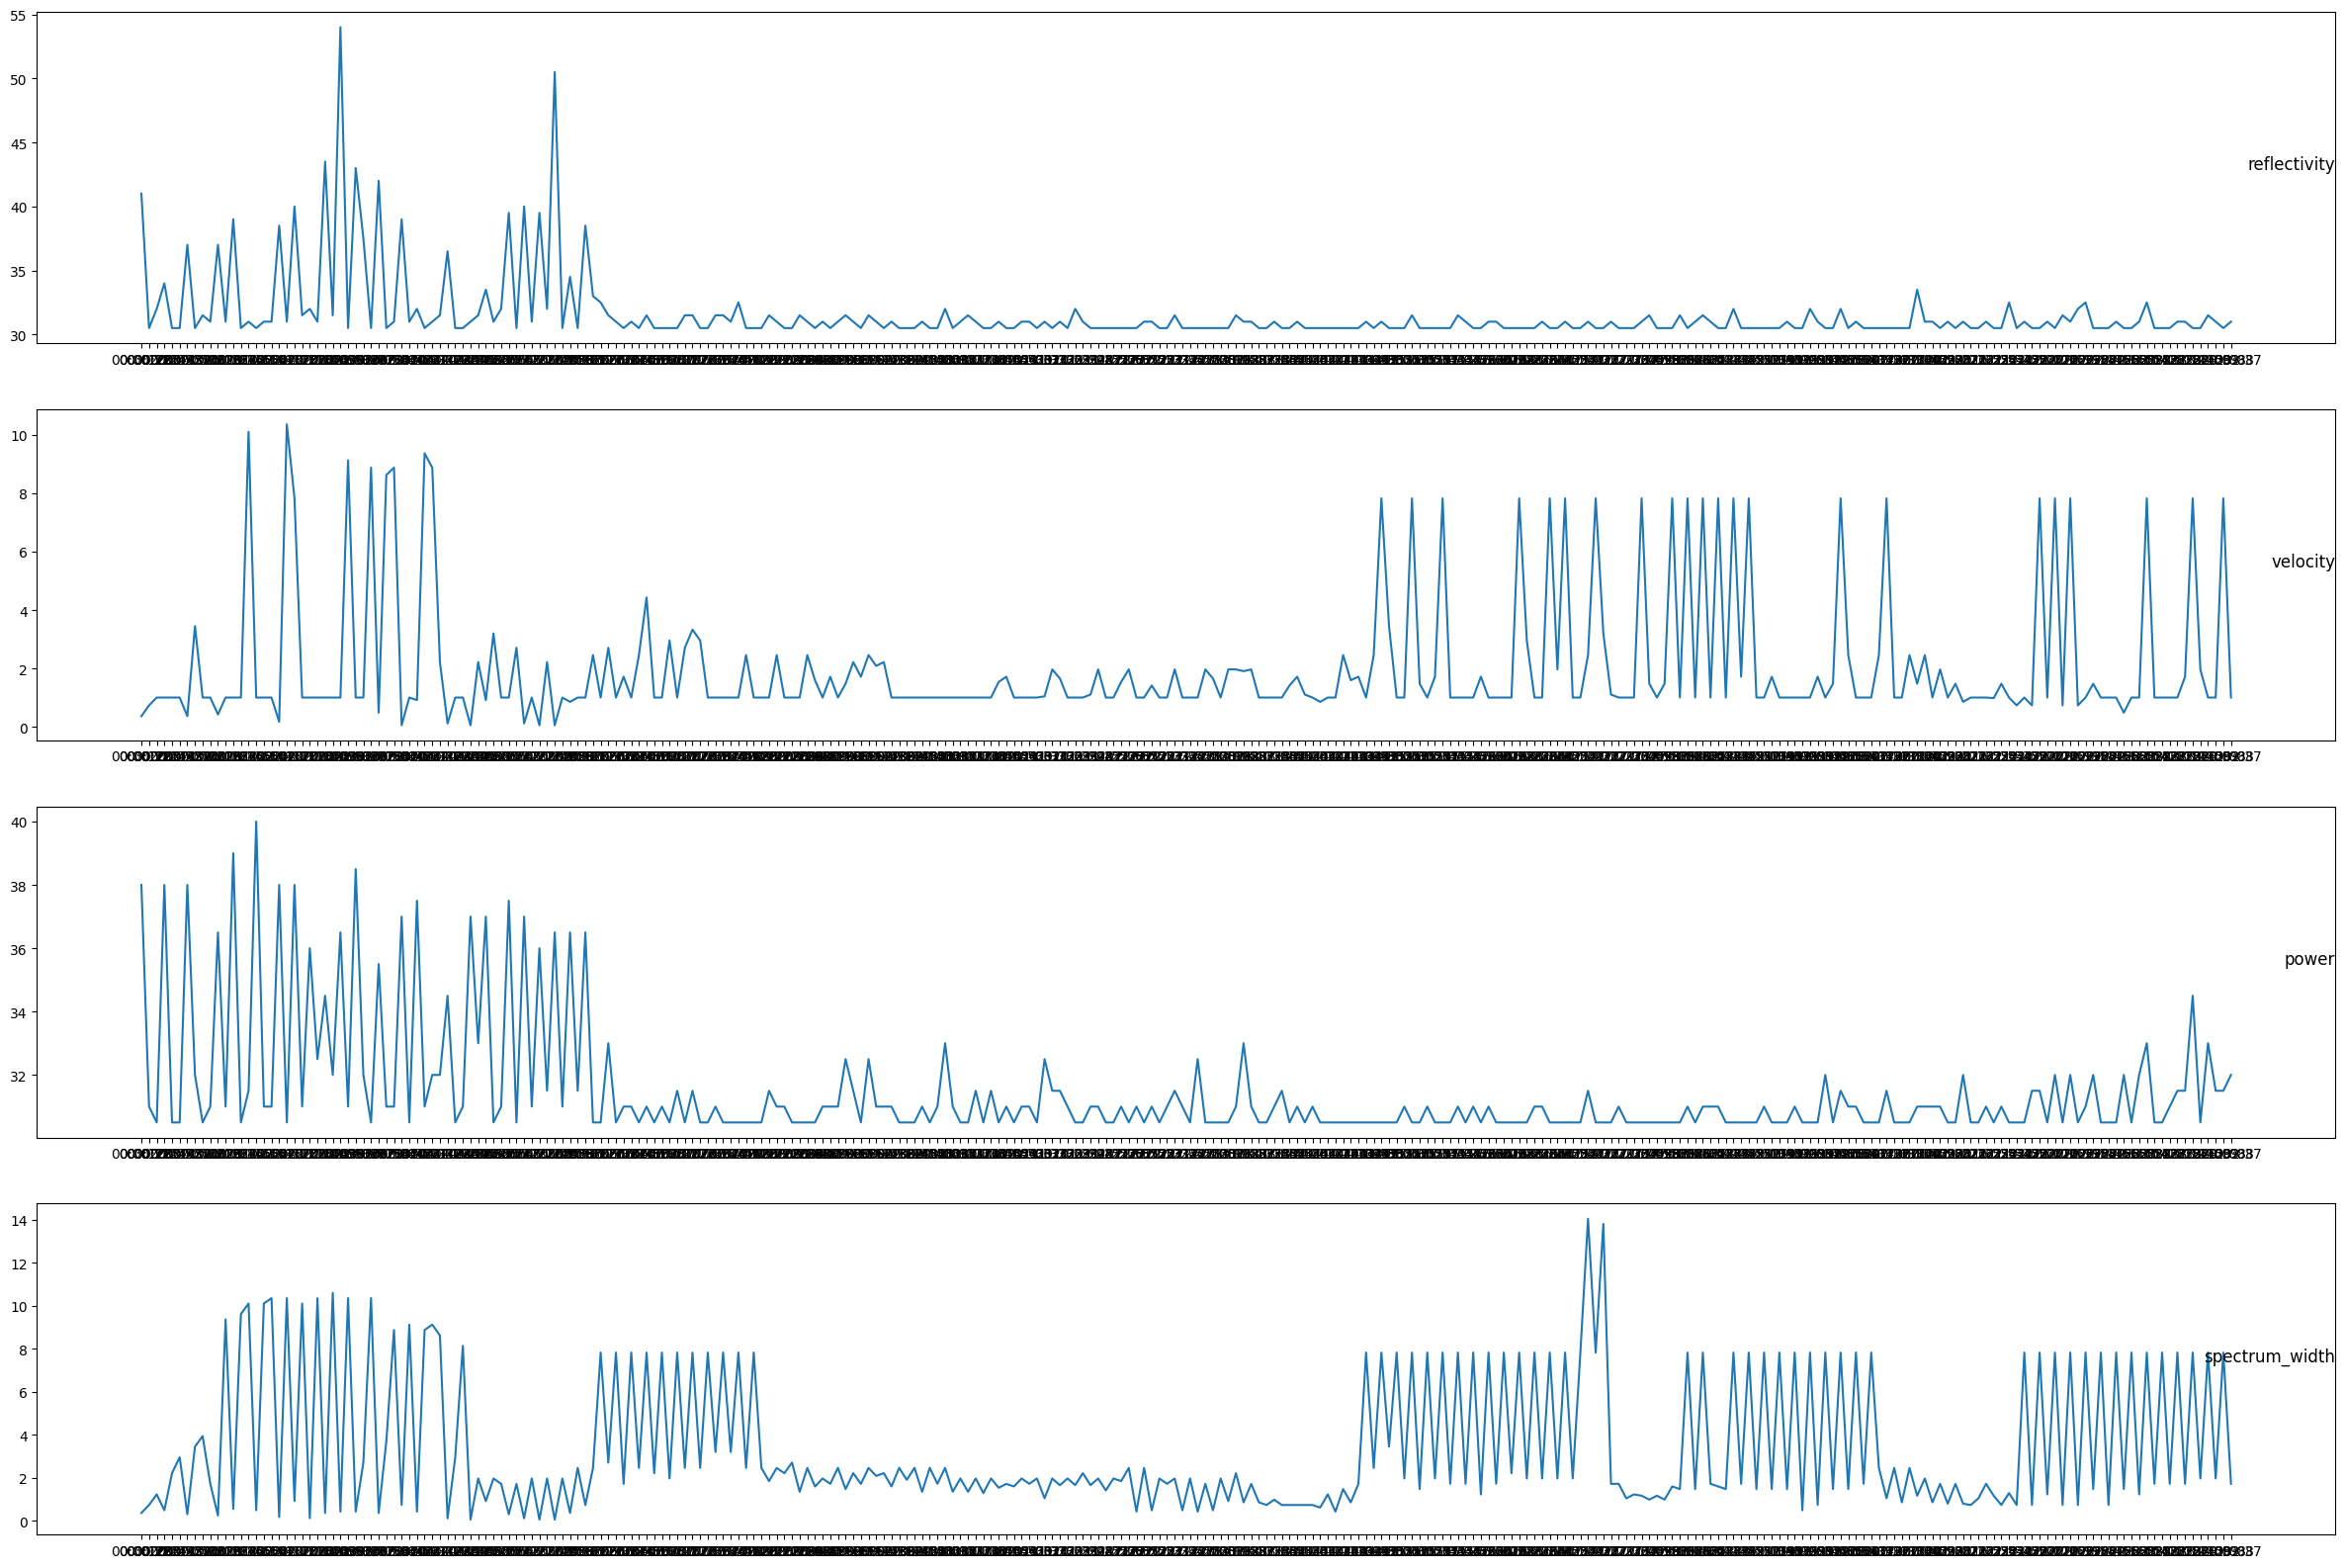

In [ ]:
no_col  = len(data.columns)

index = 1
plt.figure(figsize=(30 , 20))
for column in data.columns:
  plt.subplot(no_col , 1 , index)
  plt.plot(data[column])
  plt.title(column,loc="right" , y = 0.5)
  index += 1


plt.show()


#  new model prediction 

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into features (X) and target (y)
X = data.drop('reflectivity', axis=1)  # Replace 'target_variable' with the name of your target variable column
y = data['reflectivity']




In [ ]:
y = pd.DataFrame(y)  #convert the datastructure of 'y' into dataframes
y

,reflectivity
time,
00:00:25,41.0
00:02:25,30.5
00:12:24,32.0
00:20:23,34.0
00:22:22,30.5
...,...
23:32:09,30.5
23:40:09,31.5
23:42:08,31.0


After splitting the data, we will scale it to generalize it.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scale feature dataset
scaler = MinMaxScaler()
transformed_x = scaler.fit_transform(X)
transformed_x = pd.DataFrame(X)
print(transformed_x)

          velocity  power  spectrum_width
time                                     
00:00:25  0.370000   38.0        0.370000
00:02:25  0.740000   31.0        0.740000
00:12:24  1.007874   30.5        1.231890
00:20:23  1.007874   38.0        0.492756
00:22:22  1.007874   30.5        2.217402
...            ...    ...             ...
23:32:09  1.970000   30.5        1.970000
23:40:09  1.007874   33.0        7.822500
23:42:08  1.007874   31.5        1.971024
23:50:08  7.820000   31.5        7.820000
23:52:37  1.007874   32.0        1.724646

[274 rows x 3 columns]


In [ ]:
# scale target dataset
scaler = MinMaxScaler()
transformed_y = scaler.fit_transform(y)
transformed_y = pd.DataFrame(y)
print(transformed_y)

          reflectivity
time                  
00:00:25          41.0
00:02:25          30.5
00:12:24          32.0
00:20:23          34.0
00:22:22          30.5
...                ...
23:32:09          30.5
23:40:09          31.5
23:42:08          31.0
23:50:08          30.5
23:52:37          31.0

[274 rows x 1 columns]


split the data into train and test using train_test_split module

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape)

(219, 3) (219, 1) (55, 3)


In [ ]:
# change dimension
X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test,axis = 2)

In [ ]:
X_test

array([[[ 1.00787401],
        [32.        ],
        [ 7.82250023]],

       [[ 1.00787401],
        [30.5       ],
        [ 7.82250023]],

       [[ 7.82000017],
        [31.        ],
        [ 7.82000017]],

       [[ 1.00787401],
        [31.5       ],
        [ 1.97102356]],

       [[ 1.00787401],
        [30.5       ],
        [ 2.21740174]],

       [[ 2.46000004],
        [30.5       ],
        [ 2.46000004]],

       [[ 1.00787401],
        [31.        ],
        [ 1.97102356]],

       [[ 2.46000004],
        [30.5       ],
        [ 2.46000004]],

       [[ 1.00787401],
        [31.        ],
        [ 1.97102356]],

       [[ 7.82000017],
        [30.5       ],
        [ 1.60000002]],

       [[ 1.72000003],
        [30.5       ],
        [ 1.48000002]],

       [[ 0.74000001],
        [30.5       ],
        [ 0.74000001]],

       [[ 1.00787401],
        [31.        ],
        [ 7.82250023]],

       [[ 1.00787401],
        [30.5       ],
        [ 1.4166733 ]],

      

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape)

(219, 3, 1) (219, 1) (55, 3, 1)


 Import all the required libraries 

---



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Model with different layers

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model architecture
model = Sequential()
# model.add(LSTM(72, input_shape=(3,1)))
model.add(LSTM(84, activation='relu', input_shape=(3, 1)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.add(Dense(1))

# Print a summary of the model architecture
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 84)                28896     
                                                                 
 dense_17 (Dense)            (None, 16)                1360      
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 30,275
Trainable params: 30,275
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Define the checkpoint callback to save the best model weights
# checkpoint = ModelCheckpoint('modell/', save_best_only=True)

# Compile the model with the mean squared error loss function, Adam optimizer, and accuracy metric
model.compile(loss='MeanSquaredError', optimizer=Adam(learning_rate=0.001), metrics=['RootMeanSquaredError'])


In [ ]:
# Train the model
# model with the given training data and save the best model weights using the checkpoint callback
history = model.fit(X_train, y_train, epochs=75, steps_per_epoch=10, batch_size=15, shuffle=False)

# Save the entire model to a file
model.save('lstm_model.h5')

Epoch 1/75
10/10 [==============================] - 0s 5ms/step - loss: 5.1206 - root_mean_squared_error: 2.2629
Epoch 2/75
10/10 [==============================] - 0s 5ms/step - loss: 4.7207 - root_mean_squared_error: 2.1727
Epoch 3/75
10/10 [==============================] - 0s 6ms/step - loss: 2.4459 - root_mean_squared_error: 1.5639
Epoch 4/75
10/10 [==============================] - 0s 5ms/step - loss: 5.4919 - root_mean_squared_error: 2.3435
Epoch 5/75
10/10 [==============================] - 0s 7ms/step - loss: 4.8253 - root_mean_squared_error: 2.1967
Epoch 6/75
10/10 [==============================] - 0s 8ms/step - loss: 2.4853 - root_mean_squared_error: 1.5765
Epoch 7/75
10/10 [==============================] - 0s 8ms/step - loss: 5.5654 - root_mean_squared_error: 2.3591
Epoch 8/75
10/10 [==============================] - 0s 8ms/step - loss: 4.8280 - root_mean_squared_error: 2.1973
Epoch 9/75
10/10 [==============================] - 0s 8ms/step - loss: 2.4000 - root_mean_squar

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('lstm_model.h5')

In [ ]:
values = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


**loss and rmse**

In [ ]:
#reflectivity prediction model
loss, rmse = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test RMSE:", rmse)

2/2 [==============================] - 0s 10ms/step - loss: 1.6841 - root_mean_squared_error: 1.2977
Test loss: 1.6840780973434448
Test RMSE: 1.2977204322814941


In [ ]:
X_test.shape

(55, 3, 1)

In [ ]:
y_train.shape

(219, 1)

In [ ]:
predictions = pd.DataFrame(y_test)
predictions["ref_pred"] = values
predictions["ref_pred"] = predictions["ref_pred"].astype(int) 
predictions.sort_index(axis=0, kind='mergesort')
predictions.head()

,reflectivity,ref_pred
time,,
19:30:06,30.5,31
22:50:15,30.5,30
18:10:44,31.5,30
10:23:05,30.5,31
16:02:28,30.5,30


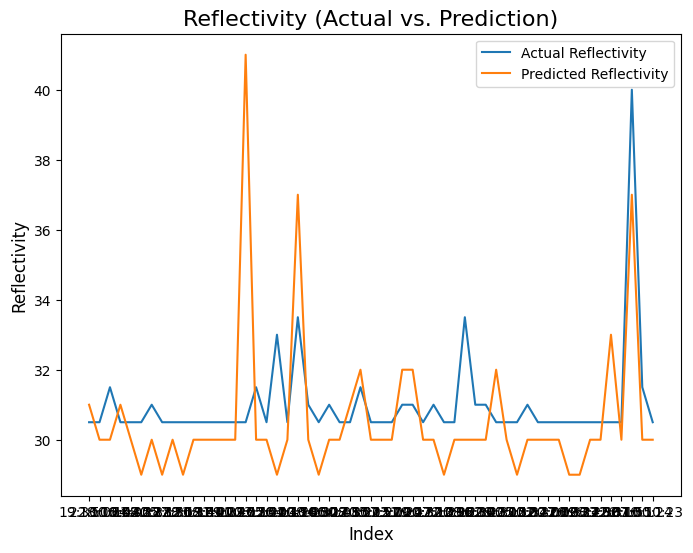

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size to a reasonable value
plt.figure(figsize=(8, 6))

# Add a title to the plot and set font size
plt.title("Reflectivity (Actual vs. Prediction)", fontsize=16)

# Plot the actual reflectivity data and label the line
plt.plot(predictions['reflectivity'], label='Actual Reflectivity')

# Plot the predicted reflectivity data and label the line
plt.plot(predictions['ref_pred'], label='Predicted Reflectivity')

# Add a legend to the plot
plt.legend()

# Label the x and y axes and set font size
plt.xlabel('Index', fontsize=12)
plt.ylabel('Reflectivity', fontsize=12)

# Set the tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()
